#### Analysis of a single stock

Goal: Take 1 stock and run a trendline through 1 year. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week.

This is a strategy thought up by someone who admittedly knows almost nothing about long term stock trading. Determine points in time where the stock is underperforming and opt to buy in. This would only work for stocks you believe will rise in the long term.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# choose the stock of interest

stock = yf.Ticker("amd")

In [3]:
# pull data

# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

df = stock.history(period="1y")
df = df.dropna() #in case the first row generates as nulls
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-01,91.919998,92.510002,90.190002,92.180000,55825600,0,0
2020-09-02,94.010002,94.279999,88.739998,90.220001,50366900,0,0
2020-09-03,87.839996,88.470001,81.589996,82.540001,87462700,0,0
2020-09-04,81.449997,84.389999,76.330002,82.010002,82267800,0,0
2020-09-08,78.050003,81.879997,78.000000,78.690002,54955700,0,0
...,...,...,...,...,...,...,...
2021-08-26,108.570000,109.230003,106.839996,107.269997,51442500,0,0
2021-08-27,108.010002,111.779999,107.800003,111.400002,60970800,0,0
2021-08-30,112.610001,114.489998,111.260002,111.320000,56130500,0,0


In [4]:
# add index to df

df = pd.DataFrame(df['Close'])
add = np.arange(1,len(df)+1)

df['Index'] = add

df

,Close,Index
Date,,
2020-09-01,92.180000,1
2020-09-02,90.220001,2
2020-09-03,82.540001,3
2020-09-04,82.010002,4
2020-09-08,78.690002,5
...,...,...
2021-08-26,107.269997,249
2021-08-27,111.400002,250
2021-08-30,111.320000,251


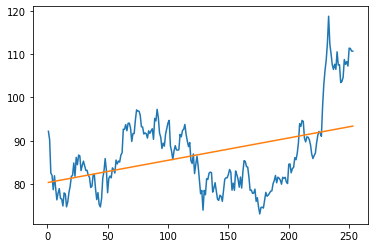

In [5]:
# plot data with a trendline

x = df['Index']
y = df['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


In [6]:
# create pred list w/ index

nlist = []

for i in range(1,len(df)+1):
    d = m*i+b
    nlist.append(d)
    
pred = pd.DataFrame(nlist, columns = ['Pred'])

add = np.arange(1,len(df)+1)

pred['Index'] = add
pred

,Pred,Index
0,80.367140,1
1,80.418782,2
2,80.470424,3
3,80.522066,4
4,80.573708,5
...,...,...
248,93.174355,249
249,93.225997,250
250,93.277639,251
251,93.329281,252


In [7]:
# create pred/close list w/ index

nlist = []
ylist = []

for i in range(1,len(df)+1):
    d = (pred['Pred'].iloc[i-1])/(df['Close'].iloc[i-1])
    nlist.append(d)
    
pred_calc = pd.DataFrame(nlist, columns = ['Pred/Close'])
pred_calc

add = np.arange(1,len(df)+1)

pred_calc['Index'] = add
pred_calc

,Pred/Close,Index
0,0.871850,1
1,0.891363,2
2,0.974926,3
3,0.981857,4
4,1.023938,5
...,...,...
248,0.868597,249
249,0.836858,250
250,0.837923,251
251,0.842931,252


In [8]:
# merge close, pred, and pred/close on index

df = pd.merge(left=df, right=pred, left_on='Index', right_on='Index')
df = pd.merge(left=df, right=pred_calc, left_on='Index', right_on='Index')

df.shape
df

,Close,Index,Pred,Pred/Close
0,92.180000,1,80.367140,0.871850
1,90.220001,2,80.418782,0.891363
2,82.540001,3,80.470424,0.974926
3,82.010002,4,80.522066,0.981857
4,78.690002,5,80.573708,1.023938
...,...,...,...,...
248,107.269997,249,93.174355,0.868597
249,111.400002,250,93.225997,0.836858
250,111.320000,251,93.277639,0.837923
251,110.720001,252,93.329281,0.842931


In [9]:
# Is the stock currently higher than the pedicted?
# higher than 1 = the stock is currently lower than predicted
# less than 1 = the stock is currently higher than predicted

round(df['Pred/Close'].iloc[len(df)-1],4)

0.8435